## Bank Customer Churn Rate Prediction using ANN
A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.

In [1]:
# Importing all the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data  = pd.read_csv('Churn_Modelling.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# checking the total number of missing values present in the data
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
data.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

### Descriptive statistics for numerical columns

In [10]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Descriptive statistics for categorical columns

In [11]:
data.describe(include=[object])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [12]:
data_col = data[['Exited','Gender','CreditScore','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember',
                 'EstimatedSalary','Geography']]

### Outlier detection

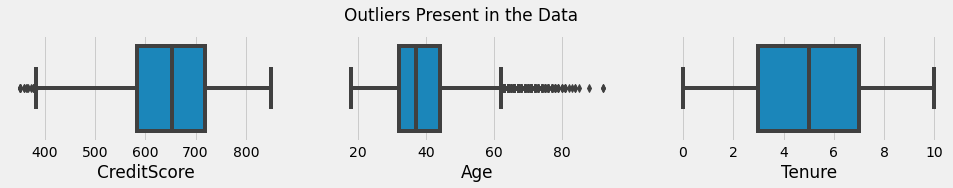

In [13]:
# univariate analysis on numerical columns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(2, 3, 1)
sns.boxplot(data_col['CreditScore'])

plt.subplot(2, 3, 2)
sns.boxplot(data_col['Age'])

plt.subplot(2, 3, 3)
sns.boxplot(data_col['Tenure'])

plt.suptitle('Outliers Present in the Data')
plt.show()

### Univariate Analysis on the Numerical Columns

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

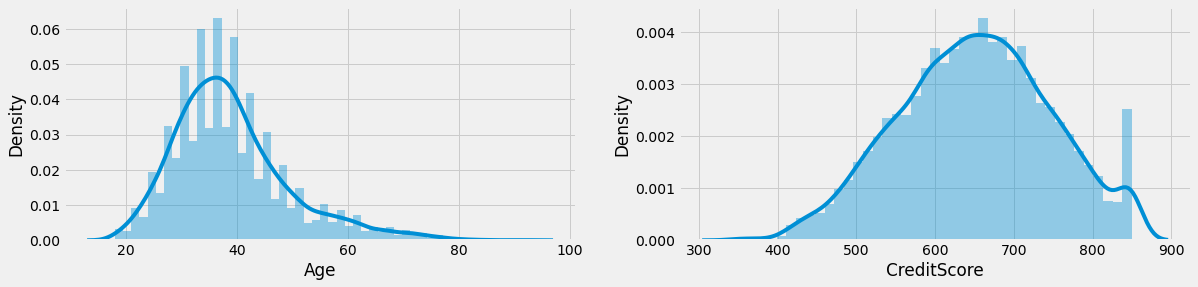

In [14]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (18, 4)

plt.subplot(1, 2, 1)
sns.distplot(data_col['Age'])

plt.subplot(1, 2, 2)
sns.distplot(data_col['CreditScore'])



### Univariate Analysis on the Categorical Columns

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

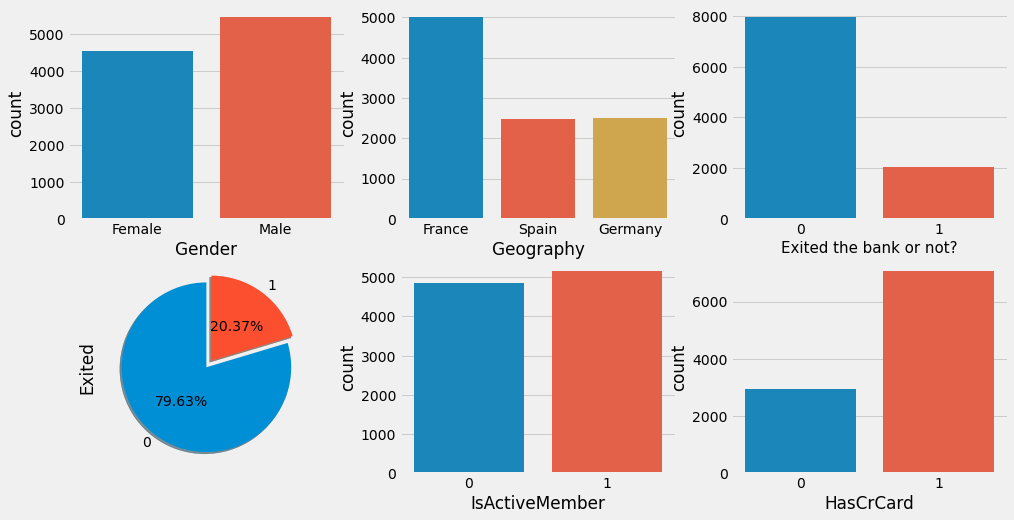

In [15]:
# univariate analysis on categorical column
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 3, 1)
sns.countplot(data['Gender'])

plt.subplot(2, 3, 2)
sns.countplot(data['Geography'])

plt.subplot(2, 3, 3)
sns.countplot(data_col['Exited'])

plt.xlabel('Exited the bank or not?', fontsize = 15)

plt.subplot(2, 3, 4)
data_col['Exited'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['0','1'], shadow = True, pctdistance = 0.5)

plt.subplot(2, 3, 5)
sns.countplot(data_col['IsActiveMember'])

plt.subplot(2, 3, 6)
sns.countplot(data_col['HasCrCard'])


In [16]:
print('Impact of Gender on Churn rate')
print(pd.crosstab(data_col['Gender'], data['Exited']))
print('\n')

Impact of Gender on Churn rate
Exited     0     1
Gender            
Female  3404  1139
Male    4559   898




## Bivariate Analysis 
### Impact of Gender on Churn Rate

Text(0.5, 1.0, 'Effect of Gender on Churn Rate')

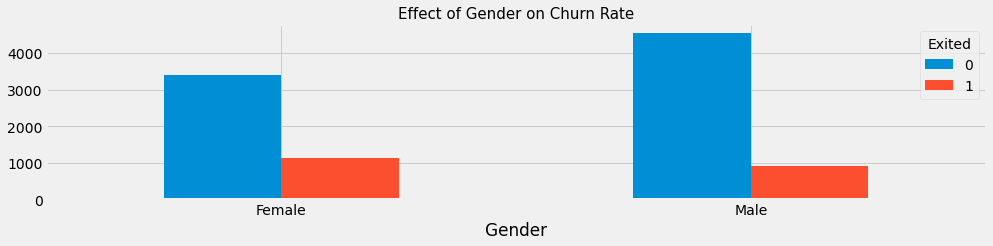

In [17]:
plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(data_col['Gender'], data_col['Exited'])
barplot = x.plot.bar(rot=0)
plt.title('Effect of Gender on Churn Rate', fontsize = 15)

### Multivariate Analysis

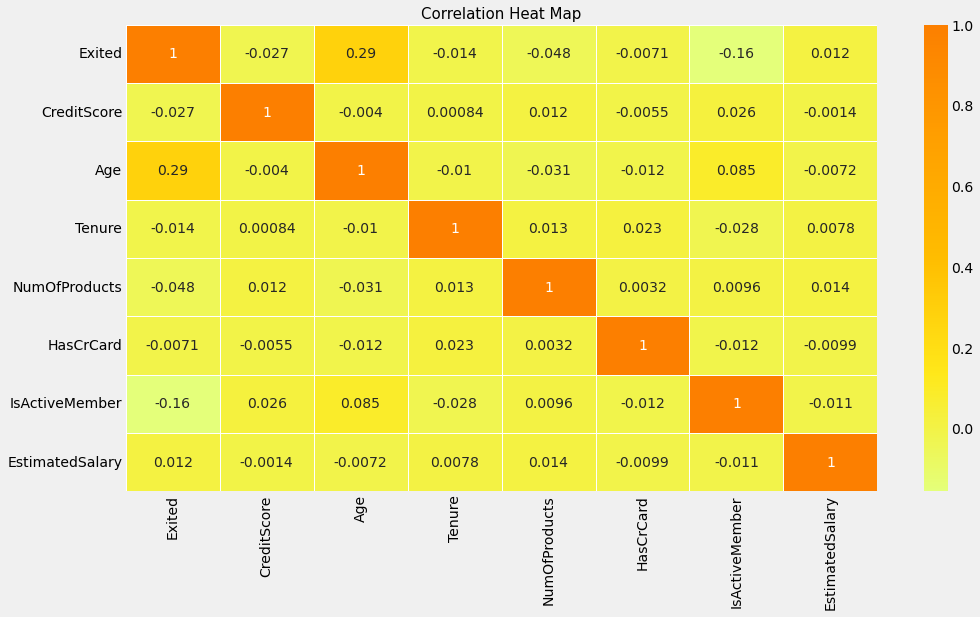

In [18]:
# multivariate analysis
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data_col.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

### Encoding the categorical columns to convert them into numerical columns using LabelEncoder

In [19]:
# lets start encoding these categorical columns to convert them into numerical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])

In [20]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
x = data.drop(['Exited'], axis=1)
y = data['Exited']

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (12740, 10)
Shape of the y Train : (12740,)
Shape of the x Test : (3186, 10)
Shape of the y Test : (3186,)


### Feature Scalling using StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_trained_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [25]:
x_trained_scaler.shape

(12740, 10)

### Creating the model using Artifical Neural Network

In [26]:
import tensorflow as tf
from tensorflow import keras 

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_trained_scaler, y_train, epochs=50)

Epoch 1/50
399/399 [==============================] - 2s 1ms/step - loss: 0.5404 - accuracy: 0.7254
Epoch 2/50
399/399 [==============================] - 1s 1ms/step - loss: 0.4539 - accuracy: 0.7855
Epoch 3/50
399/399 [==============================] - 1s 1ms/step - loss: 0.4388 - accuracy: 0.7960
Epoch 4/50
399/399 [==============================] - 1s 1ms/step - loss: 0.4278 - accuracy: 0.8004
Epoch 5/50
399/399 [==============================] - 1s 1ms/step - loss: 0.4180 - accuracy: 0.8076
Epoch 6/50
399/399 [==============================] - 1s 1ms/step - loss: 0.4099 - accuracy: 0.8115
Epoch 7/50
399/399 [==============================] - 1s 1ms/step - loss: 0.4029 - accuracy: 0.8169
Epoch 8/50
399/399 [==============================] - 1s 1ms/step - loss: 0.3977 - accuracy: 0.8206
Epoch 9/50
399/399 [==============================] - 1s 1ms/step - loss: 0.3942 - accuracy: 0.8206
Epoch 10/50
399/399 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8242

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 14)                154       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


In [40]:
print(tf.__version__)

2.10.0


In [27]:
model.evaluate(x_test_scaler, y_test)

100/100 [==============================] - 1s 1ms/step - loss: 0.3739 - accuracy: 0.8311


[0.3739025890827179, 0.8311362266540527]

In [28]:
y_predict = model.predict(x_test_scaler)
y_predict[:5]

100/100 [==============================] - 0s 1ms/step


array([[0.73572904],
       [0.93189514],
       [0.06142385],
       [0.03351077],
       [0.10722256]], dtype=float32)

In [29]:
y_pred = []
for element in y_predict:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [30]:
y_pred[:10]

[1, 1, 0, 0, 0, 0, 1, 1, 0, 0]

In [31]:
y_test[:10]

809      0
10711    1
2592     0
2513     0
8405     0
5020     1
2918     1
13785    1
10244    1
2806     1
Name: Exited, dtype: int64

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1593
           1       0.84      0.82      0.83      1593

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



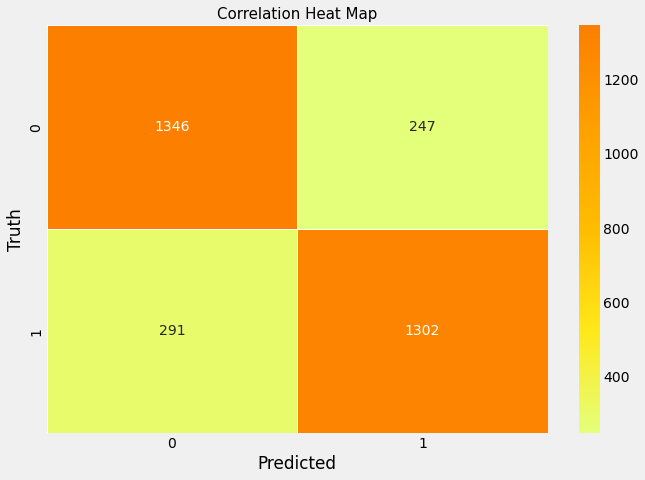

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.rcParams['figure.figsize'] = (10, 7)
sns.heatmap(cm, annot = True, linewidth = 0.5, cmap = 'Wistia', fmt='d')
plt.title('Correlation Heat Map', fontsize = 15)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


## The Accuracy of the model using ANN is 82%

In [33]:
!pip install joblib

In [38]:
model.save('model.h5')

In [35]:
import joblib

# Save the model to disk
filename = 'churn_model.joblib'
joblib.dump(model, filename)


INFO:tensorflow:Assets written to: ram://f0b21be8-f814-40af-b763-fc2b669076ee/assets


['churn_model.joblib']

In [37]:
import pickle

# Train your ANN model here...

# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


INFO:tensorflow:Assets written to: ram://00530f4c-2498-458e-88ee-6ca6c882fcc4/assets


In [ ]:
'''!pip install wandb
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset
    
    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})
    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()